<a href="https://colab.research.google.com/github/rootofdata/Outlier_Detection/blob/main/EDA_for_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Outlier Detection Paper'

/content/drive/MyDrive/Outlier Detection Paper


In [ ]:
!ls

'data (1)'


### 필요한 라이브러리 호출

In [ ]:
from glob import glob
import os

import pandas as pd
import numpy as np
import datetime
import time

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False   # 한글 폰트 패치.

import warnings
warnings.filterwarnings('ignore')   # 경고문 처리.

from sklearn.preprocessing import StandardScaler

##1. Data Load

###데이터 불러오기 & 전처리

In [ ]:
def load_dataset(path):
    feature_list = ['created','temperature','humidity','co','h2s',
                    'no2','sgp30_tvoc', 'sgp30_co2','nh3','pm_mass_10']
    new_feature_name = ['time','tmp','hmd','co','h2s',
                        'no2','tvoc','co2','nh3','pm_mass_10']
    
    df = pd.DataFrame(columns = new_feature_name)
    path = path
    flist = sorted(glob(path+'data/*.xlsx'))
    for filename in flist:
        print(filename)
        
        # 원하는 특성만 추출하기
        file = pd.read_excel(filename)
        file = file[feature_list]
        file = pd.DataFrame(file.to_numpy(),columns=new_feature_name)
        
        # 결측치 처리, 실수화
        for col in new_feature_name[1:]:
            file[col] = file[col].astype(str)
            try:
                file[col] = file[col].astype(float)
            except:
                file[col] = file[col].apply(lambda x : np.nan if x[:1] == "'" else x)
                file.fillna(method='bfill', inplace=True)
                file[col] = file[col].astype(float)
        
        # 데이터 병합
        df = pd.merge(df,file,how='outer')
    
    # 시간 순으로 정렬, datetime 변수로 타입 변경
    df['time'] = pd.to_datetime(df['time'])
    df = df.sort_values('time')

    return df

In [ ]:
path = ''
df = load_dataset(path)
df_data = df.iloc[:,1:]
df_date = df.iloc[:,0]

print(df_data.shape)
print(df_date.shape)
df.head(2)

data/grafana_data_export_dd1d_0323.xlsx
(209, 9)
(209,)


,time,tmp,hmd,co,h2s,no2,tvoc,co2,nh3,pm_mass_10
208,2022-03-23 00:18:33,22.628416,23.925556,3164.0,33.0,143.0,268.0,527.0,0.606061,8.341708
207,2022-03-23 00:28:33,22.596243,23.944452,3534.0,19.0,139.0,267.0,518.0,0.303030,8.465037


In [ ]:
df_time=df.set_index('time')
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_time)
df_scaled = pd.DataFrame(df_scaled,columns=df_data.columns.to_list())

### 최종 데이터셋 : df, df_data, df_date, df_scaled

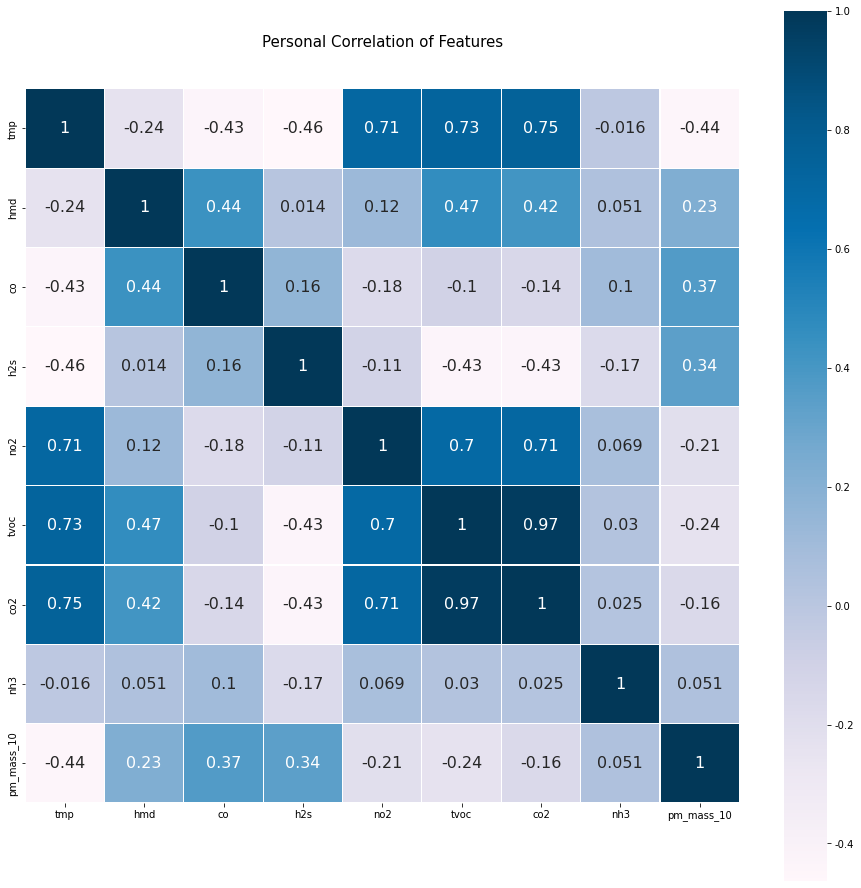

In [ ]:
colormap = plt.cm.PuBu 
plt.figure(figsize=(16, 16)) 
plt.title("Personal Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(df_scaled.corr(), linewidths = 0.1, vmax = 1.0,
            square = True, cmap = colormap, linecolor = "white", annot = True, 
            annot_kws = {"size" : 16})
plt.show()

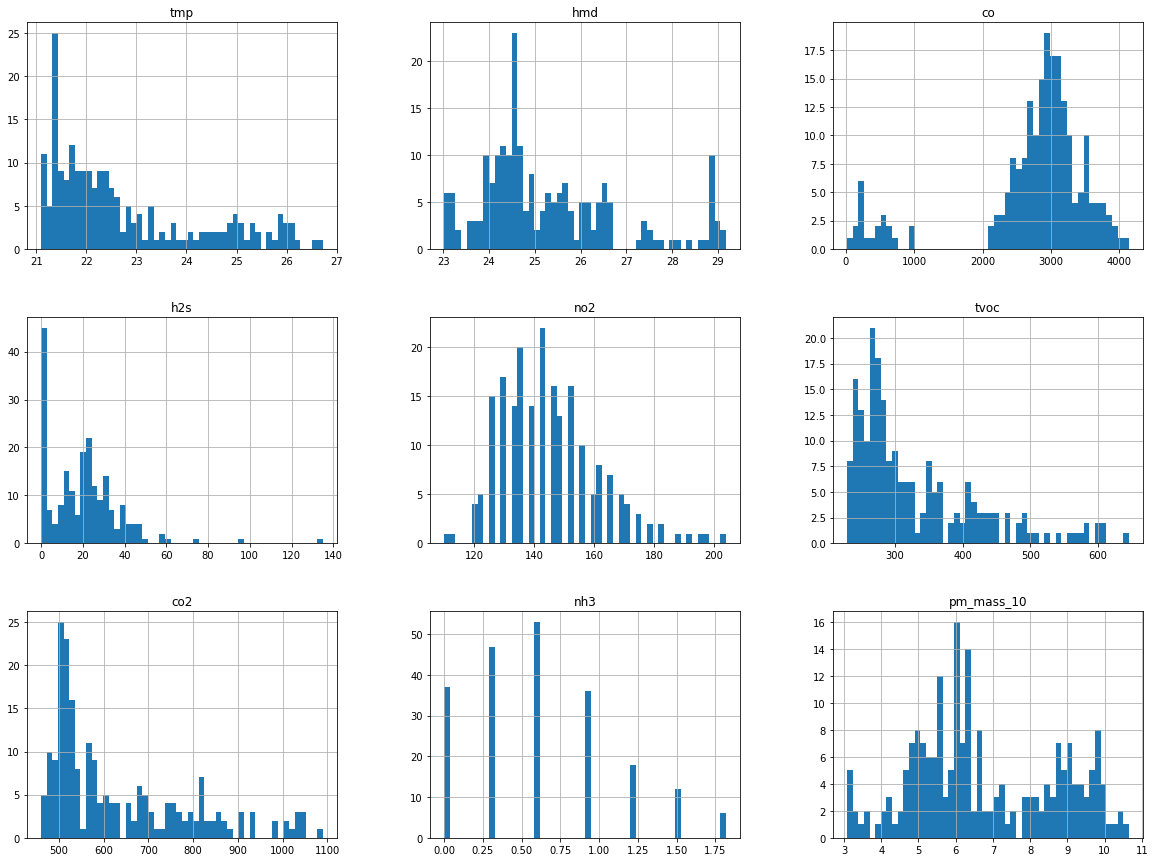

In [ ]:
#분포도 확인
import matplotlib.pyplot as plt
df_time.hist(bins=50,figsize=(20,15))
plt.show()

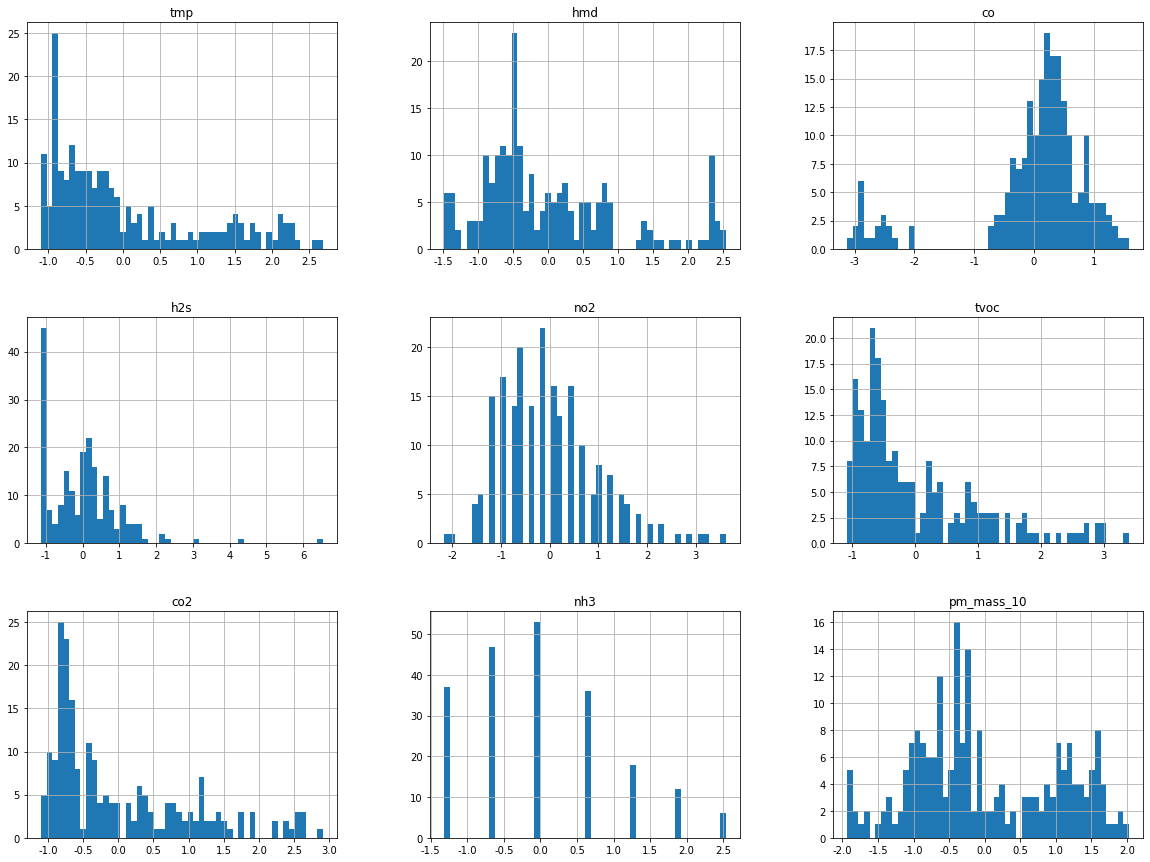

In [ ]:
#분포도 확인
import matplotlib.pyplot as plt
df_scaled.hist(bins=50,figsize=(20,15))
plt.show()

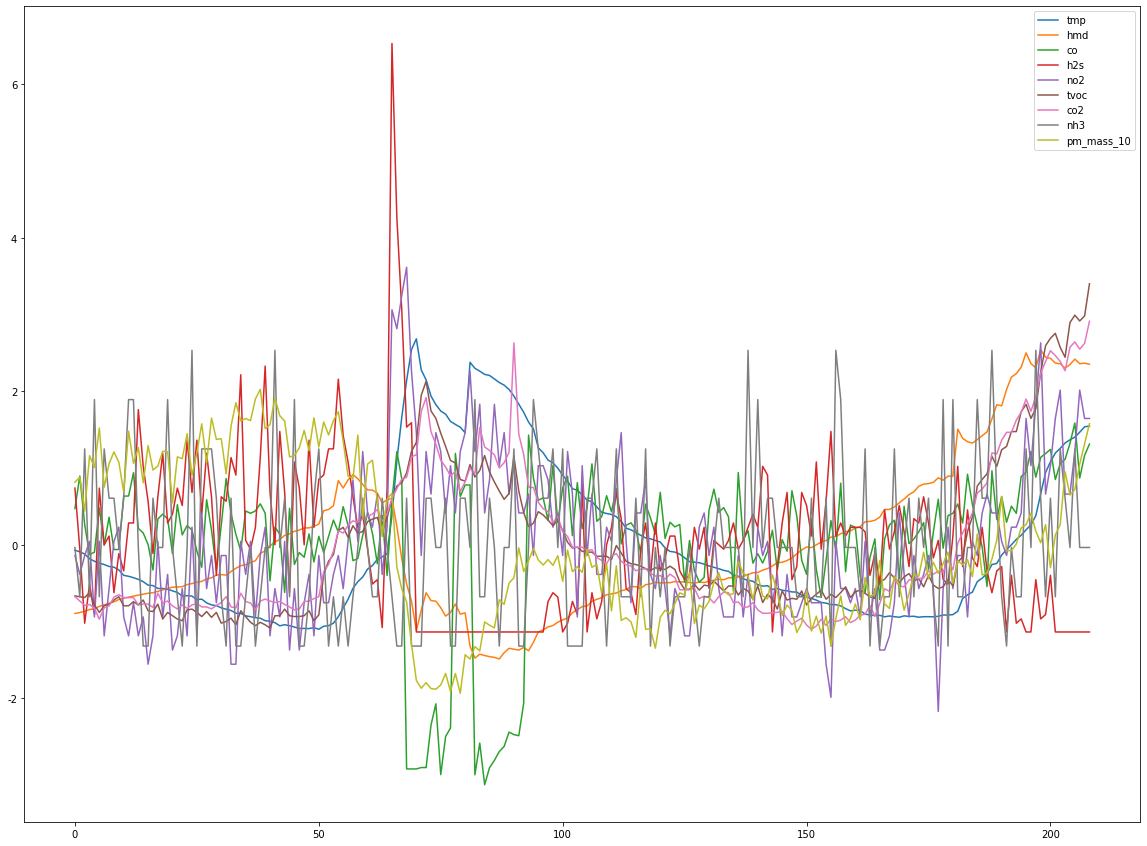

In [ ]:
df_scaled.plot(figsize=(20,15))
plt.show()

In [ ]:
df

,time,tmp,hmd,co,h2s,no2,tvoc,co2,nh3,pm_mass_10
208,2022-03-23 00:18:33,22.628416,23.925556,3164.0,33.0,143.0,268.0,527.0,0.606061,8.341708
207,2022-03-23 00:28:33,22.596243,23.944452,3534.0,19.0,139.0,267.0,518.0,0.303030,8.465037
206,2022-03-23 00:38:32,22.553349,23.968086,2981.0,2.0,143.0,266.0,509.0,1.212121,7.619925
205,2022-03-23 00:48:32,22.462194,24.004433,2639.0,11.0,146.0,272.0,511.0,0.303030,9.002205
204,2022-03-23 00:58:32,22.413939,24.018709,2666.0,4.0,130.0,257.0,503.0,1.515152,8.709224
...,...,...,...,...,...,...,...,...,...,...
4,2022-03-24 15:15:50,24.767828,28.876652,3905.0,0.0,156.0,599.0,1037.0,0.606061,8.020943
3,2022-03-24 15:25:50,24.818768,28.985783,4138.0,0.0,165.0,608.0,1048.0,1.212121,8.157503
2,2022-03-24 15:45:49,24.915281,28.894648,3511.0,0.0,178.0,601.0,1033.0,0.606061,8.794644
1,2022-03-24 15:55:48,25.019840,28.905048,3769.0,0.0,172.0,607.0,1045.0,0.606061,9.297753


ValueError: ignored

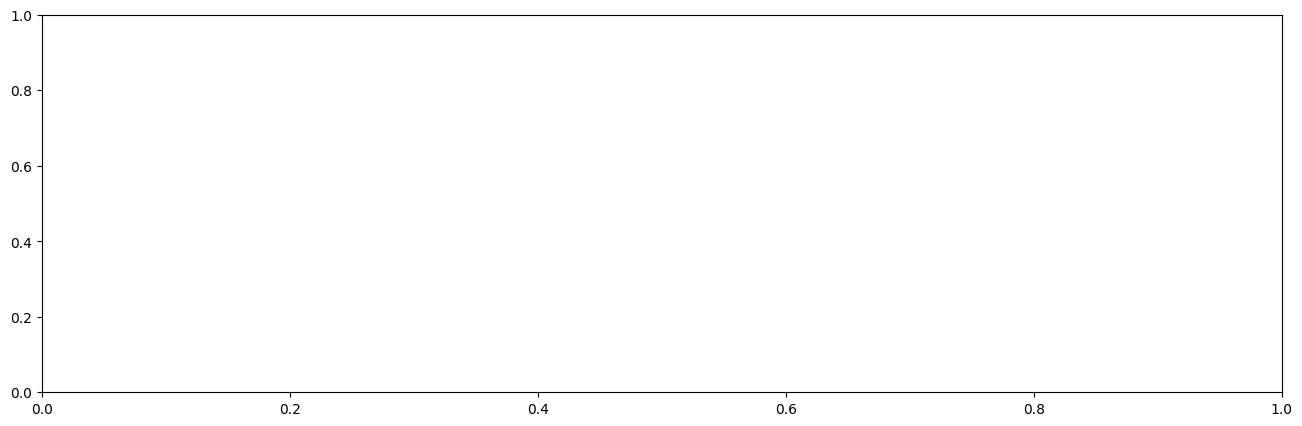

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
for i in range(len(df.columns)):
  plot_df(df, x=df['time'],y=df.columns[i],title=df.columns[i]+'시계열 분포')